In [30]:
import pandas as pd

In [31]:
df= pd.read_csv("titanic.csv") #titanic.xlxs #pd.read_exlxs("titanic.xlsx")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


</h1>Checking Null Values</h1>

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4/>Cabin should be dropped now or later because it has 687 no registry<h4/>

In [33]:
df["Cabin"].isnull().sum()

687

In [34]:
df2=df.drop("Cabin",axis=1) #axis=1 bolte whole column bujhay. axis=0 bolte row 

In [35]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [36]:
df2["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [37]:
df2["Embarked"].fillna("S", inplace= True) # since most of the passengers embarked from S, so 2 remanining non identified person can be put in "S", because "2" is "insignificant". Data wont be corrupted. Inplace= TRue means, df2 is being updated

In [38]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<h1/> Best way to fill the null values in age? mean? avg? or the most frequent age in the dataset?<h1/>

In [41]:
df2["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [42]:
df2["Age"].mean()

29.69911764705882

In [43]:
df2["Age"].max()

80.0

In [44]:
df2["Age"].min()

0.42

<h2/>if i use mean, it will disrupt the data because i cannot assign 177 people of the same age,to avoid it, we can use "mode[0]" which gives us the most frequently used age in the datasheet and assign it properly<h2/>

In [49]:
df2["Age"].fillna(df2["Age"].mode()[0],inplace= True) #it returns as list so, we used [0]

In [51]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h2/> Visualization <h2/>

In [52]:
import matplotlib.pyplot as plt

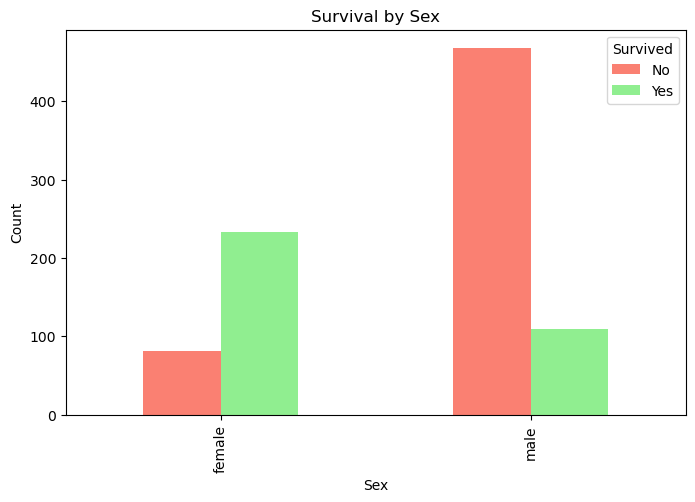

In [53]:
# Plot 1: Survival by Sex
sex_survived = df2.groupby(['Sex', 'Survived']).size().unstack()
sex_survived.plot(kind='bar', figsize=(8, 5), color=['salmon', 'lightgreen'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

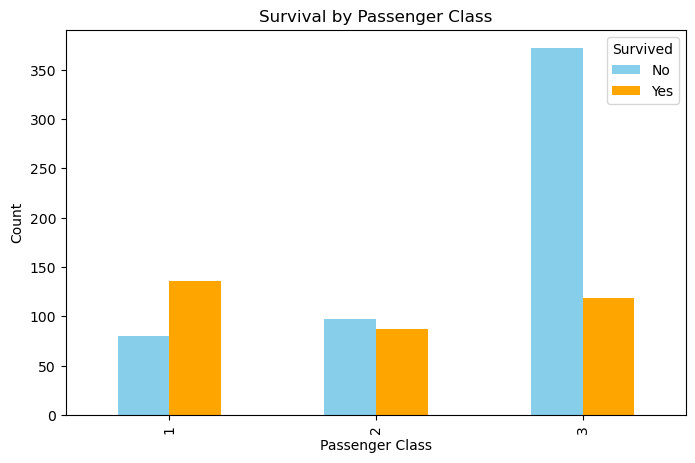

In [54]:
# Plot 2: Survival by Pclass
pclass_survived = df2.groupby(['Pclass', 'Survived']).size().unstack()
pclass_survived.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

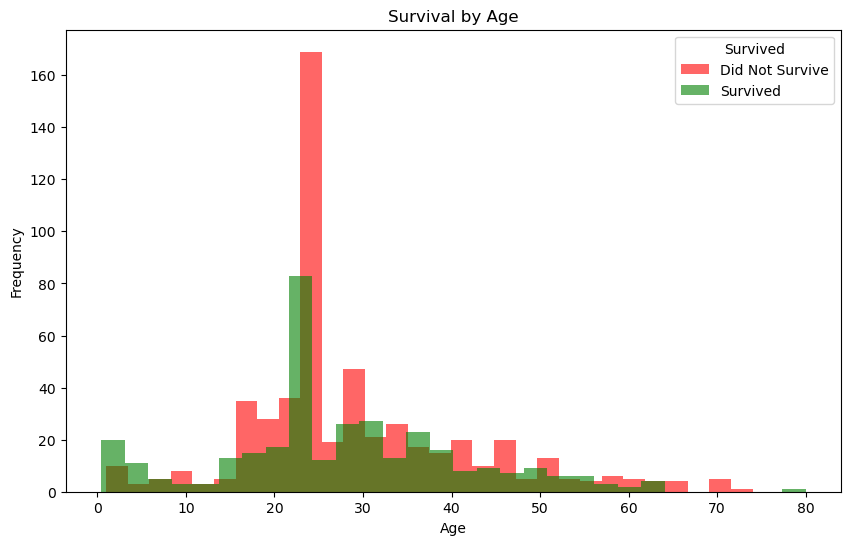

In [55]:
# Survival by Age (Histogram)
plt.figure(figsize=(10, 6))

# Plot non-survivors in red
plt.hist(df2[df2['Survived'] == 0]['Age'], bins=30, alpha=0.6, label='Did Not Survive', color='red')

# Plot survivors in green (ensuring only one green shade)
plt.hist(df2[df2['Survived'] == 1]['Age'], bins=30, alpha=0.6, label='Survived', color='green')

plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived')
plt.show()

In [56]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<h1/> columns to remove: PassengerId, Name, Ticket <h1/>

In [57]:
df2.drop(["PassengerId", "Name", "Ticket"],axis=1, inplace=True)

In [58]:

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [59]:
df2["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [60]:
df2["Sex"] = df2["Sex"].replace({"male":0, "female":1})

In [61]:

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,24.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [62]:

df2["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [63]:
df2["Embarked"] = df2["Embarked"].replace({"S":0, "C":1, "Q":2})

In [64]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


<h2/>seperating features and label<h2/>

In [65]:
X = df2.drop("Survived",axis=1)
y = df2["Survived"]

In [66]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,24.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [67]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [68]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [70]:
len(X_train), len(X_test)

(712, 179)

<h3/> train model <h3/>